# Diabetest

## Initialization

In [1]:
import os

IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

if IS_KAGGLE:
    os.system('pip install git+https://github.com/rbennum/ml-utils.git --quiet')

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import sklearn # type: ignore

from ml_utils import utils # type: ignore

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sklearn.set_config(transform_output='pandas')

In [3]:
if IS_KAGGLE:
    base_dir = '/kaggle/working'
    file_path = '/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv'
else:
    base_dir = os.path.dirname(os.path.abspath('__file__')) if '__file__' in locals() else os.getcwd()
    file_path = os.path.join(base_dir, 'input', 'diabetes_dataset.csv')

df = pd.read_csv(file_path) # type: ignore

In [4]:
# rename target column
df = df.rename(columns={"Diabetes_012": "Result"})

# rearrange columns
features = [col for col in df.columns if col != "Result"]
df = df[features + ["Result"]]

In [5]:
display(df.sample(10, random_state=29))
display(utils.skim_data(df))

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Result
36135,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,1.0,4.0,8.0,0.0
28792,1.0,0.0,1.0,42.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,30.0,20.0,1.0,0.0,7.0,4.0,5.0,0.0
193042,0.0,1.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,30.0,30.0,0.0,1.0,10.0,6.0,4.0,0.0
59210,1.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,5.0,0.0,0.0,11.0,6.0,8.0,0.0
7235,1.0,0.0,1.0,32.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,30.0,10.0,1.0,1.0,11.0,6.0,6.0,1.0
61855,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,5.0,7.0,0.0
122743,0.0,0.0,0.0,24.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,14.0,0.0,0.0,1.0,3.0,3.0,6.0,0.0
106609,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0,0.0
224817,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,13.0,6.0,6.0,0.0
51020,1.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,12.0,6.0,7.0,0.0


Total duplicate rows: 23899
DF shape: (253680, 22)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,HighBP,float64,0.0,0.0,57.100,2,0.00,"[1.0, 0.0]"
1,HighChol,float64,0.0,0.0,57.588,2,0.00,"[1.0, 0.0]"
2,CholCheck,float64,0.0,0.0,3.733,2,0.00,"[1.0, 0.0]"
3,BMI,float64,0.0,0.0,0.000,84,0.03,"[40.0, 25.0, 28.0, 27.0, 24.0]"
4,Smoker,float64,0.0,0.0,55.683,2,0.00,"[1.0, 0.0]"
5,Stroke,float64,0.0,0.0,95.943,2,0.00,"[0.0, 1.0]"
6,HeartDiseaseorAttack,float64,0.0,0.0,90.581,2,0.00,"[0.0, 1.0]"
7,PhysActivity,float64,0.0,0.0,24.346,2,0.00,"[0.0, 1.0]"
8,Fruits,float64,0.0,0.0,36.574,2,0.00,"[0.0, 1.0]"
9,Veggies,float64,0.0,0.0,18.858,2,0.00,"[1.0, 0.0]"


## EDA

### General Inspections

In [6]:
utils.skim_data(df)

Total duplicate rows: 23899
DF shape: (253680, 22)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,HighBP,float64,0.0,0.0,57.100,2,0.00,"[1.0, 0.0]"
1,HighChol,float64,0.0,0.0,57.588,2,0.00,"[1.0, 0.0]"
2,CholCheck,float64,0.0,0.0,3.733,2,0.00,"[1.0, 0.0]"
3,BMI,float64,0.0,0.0,0.000,84,0.03,"[40.0, 25.0, 28.0, 27.0, 24.0]"
4,Smoker,float64,0.0,0.0,55.683,2,0.00,"[1.0, 0.0]"
5,Stroke,float64,0.0,0.0,95.943,2,0.00,"[0.0, 1.0]"
6,HeartDiseaseorAttack,float64,0.0,0.0,90.581,2,0.00,"[0.0, 1.0]"
7,PhysActivity,float64,0.0,0.0,24.346,2,0.00,"[0.0, 1.0]"
8,Fruits,float64,0.0,0.0,36.574,2,0.00,"[0.0, 1.0]"
9,Veggies,float64,0.0,0.0,18.858,2,0.00,"[1.0, 0.0]"


In [7]:
df.groupby("Result").size()

Result
0.0    213703
1.0      4631
2.0     35346
dtype: int64

Conclusions:

- There are 23.899 duplicated rows.
- The data is heavily imbalanced, favoring Class 0.
- There are no missing or negative values, indicating no invalid data.

### Duplicated Rows

In [8]:
df = df.drop_duplicates(keep='first')
utils.skim_data(df)

Total duplicate rows: 0
DF shape: (229781, 22)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,HighBP,float64,0.0,0.0,54.556,2,0.00,"[1.0, 0.0]"
1,HighChol,float64,0.0,0.0,55.824,2,0.00,"[1.0, 0.0]"
2,CholCheck,float64,0.0,0.0,4.046,2,0.00,"[1.0, 0.0]"
3,BMI,float64,0.0,0.0,0.000,84,0.04,"[40.0, 25.0, 28.0, 27.0, 24.0]"
4,Smoker,float64,0.0,0.0,53.434,2,0.00,"[1.0, 0.0]"
5,Stroke,float64,0.0,0.0,95.524,2,0.00,"[0.0, 1.0]"
6,HeartDiseaseorAttack,float64,0.0,0.0,89.678,2,0.00,"[0.0, 1.0]"
7,PhysActivity,float64,0.0,0.0,26.665,2,0.00,"[0.0, 1.0]"
8,Fruits,float64,0.0,0.0,38.703,2,0.00,"[0.0, 1.0]"
9,Veggies,float64,0.0,0.0,20.519,2,0.00,"[1.0, 0.0]"


### Split Dataset

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Result', axis=1)
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=29,
    stratify=y
)

In [10]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Result
0.0    0.827112
2.0    0.152744
1.0    0.020144
Name: proportion, dtype: float64
Result
0.0    0.827121
2.0    0.152730
1.0    0.020149
Name: proportion, dtype: float64


In [11]:
utils.skim_data(X_train)

Total duplicate rows: 1204
DF shape: (183824, 21)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,HighBP,float64,0.0,0.0,54.528,2,0.00,"[0.0, 1.0]"
1,HighChol,float64,0.0,0.0,55.828,2,0.00,"[0.0, 1.0]"
2,CholCheck,float64,0.0,0.0,4.085,2,0.00,"[1.0, 0.0]"
3,BMI,float64,0.0,0.0,0.000,80,0.04,"[28.0, 25.0, 32.0, 23.0, 18.0]"
4,Smoker,float64,0.0,0.0,53.452,2,0.00,"[0.0, 1.0]"
5,Stroke,float64,0.0,0.0,95.544,2,0.00,"[0.0, 1.0]"
6,HeartDiseaseorAttack,float64,0.0,0.0,89.712,2,0.00,"[1.0, 0.0]"
7,PhysActivity,float64,0.0,0.0,26.736,2,0.00,"[0.0, 1.0]"
8,Fruits,float64,0.0,0.0,38.691,2,0.00,"[1.0, 0.0]"
9,Veggies,float64,0.0,0.0,20.553,2,0.00,"[1.0, 0.0]"


In [12]:
binary_cols = (
    utils.skim_data(X_train)
    .loc[lambda x: x['n_unique'] == 2]
    ['feature']
    .tolist()
)
categorical_cols = ['GenHlth', 'Age', 'Education', 'Income']
numerical_cols = list(
    set(X_train.columns.tolist())
    .difference(
        set(categorical_cols + binary_cols)
    )
)
print(binary_cols)
print(categorical_cols)
print(numerical_cols)

Total duplicate rows: 1204
DF shape: (183824, 21)
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
['GenHlth', 'Age', 'Education', 'Income']
['PhysHlth', 'BMI', 'MentHlth']


### Invalid Values

Values outside the normal range based on each feature.

In [13]:
# GenHlth
# ranges between 1-5

X_train[(X_train['GenHlth'] < 1) | (X_train['GenHlth'] > 5)]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [14]:
# Age
# ranges between 1-13

X_train[(X_train['Age'] < 1) | (X_train['Age'] > 13)]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [15]:
# Education
# ranges between 1-6

X_train[(X_train['Education'] < 1) | (X_train['Education'] > 6)]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [16]:
# Income
# ranges between 1-6

X_train[(X_train['Income'] < 1) | (X_train['Income'] > 8)]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [17]:
# PhysHlth
# ranges between 0-30

X_train[(X_train['PhysHlth'] < 0) | (X_train['PhysHlth'] > 30)]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [18]:
# MentHlth
# ranges between 0-30

X_train[(X_train['MentHlth'] < 0) | (X_train['MentHlth'] > 30)]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [19]:
# BMI
# ranges between 10-100

X_train[(X_train['BMI'] < 10) | (X_train['BMI'] > 100)]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


## Modeling

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import joblib

def evaluate_saved_model(model_path='diabetes_model.joblib', metadata_path=None):
    model = joblib.load(model_path)
    print(f"Loaded model from {model_path}")

    if metadata_path:
        df_result = pd.read_csv(metadata_path)
        best_index = np.argmin(df_result['rank_test_f1_macro'])
        train_score = df_result['mean_train_f1_macro'][best_index]
        test_score = df_result['mean_test_f1_macro'][best_index]
        print(f"\n[Overfitting Check] Train F1-Macro: {train_score:.4f} | Validation F1-Macro: {test_score:.4f}")
        if (train_score - test_score) > 0.10:
            print("Warning: Model may be overfitting. Consider decreasing 'C' for stronger regularization.")

    y_pred = model.predict(X_test)

    print("\n[Detailed Classification Report]")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Prediabetes', 'Diabetes']))

    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, 
        display_labels=['Normal', 'Prediabetes', 'Diabetes'], 
        cmap='Blues'
    )
    plt.title("Diabetes 3-Class Confusion Matrix")
    plt.show()

    inner_model = model.named_steps['model']
    diabetes_coefs = inner_model.coef_[2] # type: ignore
    coef_series = pd.Series(diabetes_coefs, index=numerical_cols).sort_values(ascending=False)
    print("\n[Top Features for Diabetes Class]")
    print(coef_series.head(5))

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import loguniform

def train_logreg():
    lr = LogisticRegression(random_state=29, class_weight='balanced')
    ovo_model = OneVsOneClassifier(lr)
    ovr_model = OneVsRestClassifier(lr)

    preprocessing_pipeline = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), numerical_cols)
        ]
    )
    pipeline = Pipeline(
        steps=[
            ('preprocess', preprocessing_pipeline),
            ('model', None)
        ]
    )
    param_dist = [
        {
            "model": [lr],
            "model__penalty": ['elasticnet'],
            "model__C": loguniform(1e-5, 100),
            "model__solver": ['saga'],
            "model__l1_ratio": [0, 0.5, 1],
            "model__max_iter": [15000]
        },
        {
            "model": [lr],
            "model__penalty": ['l2'],
            "model__C": loguniform(1e-5, 100),
            "model__solver": ['lbfgs', 'newton-cg', 'sag'],
            "model__max_iter": [15000]
        },
    ]
    scoring = {
        'f1_macro': 'f1_macro',
        'roc_auc_ovr': 'roc_auc_ovr',
        'roc_auc_ovo': 'roc_auc_ovo',
    }
    cv = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        cv=StratifiedKFold(shuffle=True, random_state=29),
        scoring=scoring,
        refit='f1_macro',
        return_train_score=True,
        n_iter=20,
        random_state=29
    )
    print('Start Training')
    cv.fit(X_train, y_train)

    best_strategy = type(cv.best_params_['model']).__name__
    print(f"\nBest Strategy: {type(cv.best_params_['model']).__name__}")
    print(f"Best Parameters: {cv.best_params_}")

    train_score = cv.cv_results_['mean_train_f1_macro'][cv.best_index_]
    test_score = cv.best_score_
    print(f"\n[Overfitting Check] Train F1-Macro: {train_score:.4f} | Validation F1-Macro: {test_score:.4f}")
    if (train_score - test_score) > 0.10:
        print("Warning: Model may be overfitting. Consider decreasing 'C' for stronger regularization.")

    y_pred = cv.predict(X_test)
    print("\n[Detailed Classification Report]")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Prediabetes', 'Diabetes']))

    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Normal', 'Prediabetes', 'Diabetes'], cmap='Blues')
    plt.title("Diabetes 3-Class Confusion Matrix")
    plt.show()

    best_pipe = cv.best_estimator_
    best_model = best_pipe.named_steps['model'] # type: ignore
    feature_names = numerical_cols
    model_name = type(lr).__name__
    current_timestamp = utils.get_time()
    file_name = f'{model_name}_{best_strategy}_{current_timestamp}'
    file_path = os.path.join(base_dir, 'models', f'{file_name}.joblib')
    joblib.dump(best_pipe, file_path)

    csv_path = os.path.join(base_dir, 'metadata', f'{file_name}.csv')
    results_df = pd.DataFrame(cv.cv_results_)
    results_df.to_csv(csv_path, index=False)

    print("\n[Feature Importance - Diabetes Class]")
    if isinstance(best_model, OneVsRestClassifier):
        diabetes_coefs = best_model.estimators_[2].coef_[2] # type: ignore
        coef_series = pd.Series(diabetes_coefs, index=feature_names).sort_values(ascending=False)
        print(coef_series)
    else:
        diabetes_coefs = best_model.coef_[2] # type: ignore
        coef_series = pd.Series(diabetes_coefs, index=feature_names).sort_values(ascending=False)
        print(coef_series)

Start Training

Best Strategy: LogisticRegression
Best Parameters: {'model': LogisticRegression(class_weight='balanced', random_state=29), 'model__C': np.float64(0.00048237255867443637), 'model__l1_ratio': 0.5, 'model__max_iter': 15000, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

[Overfitting Check] Train F1-Macro: 0.3904 | Validation F1-Macro: 0.3901

[Detailed Classification Report]
              precision    recall  f1-score   support

      Normal       0.89      0.68      0.77     38012
 Prediabetes       0.03      0.17      0.05       926
    Diabetes       0.28      0.46      0.35      7019

    accuracy                           0.64     45957
   macro avg       0.40      0.44      0.39     45957
weighted avg       0.78      0.64      0.69     45957



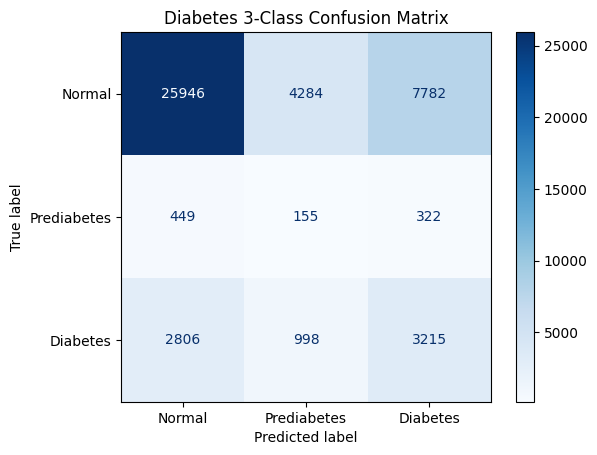

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/models/LogisticRegression_LogisticRegression_2026_01_22_16_37_06.joblib'

In [22]:
train_logreg()

In [ ]:
# file_name = 'LogisticRegression_LogisticRegression_2026_01_20_16_52_40'
# model_path = os.path.join(base_dir, 'models', f'{file_name}.joblib')
# metadata_path = os.path.join(base_dir, 'metadata', f'{file_name}.csv')
# evaluate_saved_model(model_path, metadata_path)

### Random Forest

In [25]:
%%time

from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import make_scorer, average_precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

def train_rf():
    rf = RandomForestClassifier(random_state=29)
    pipeline = Pipeline(
        steps=[
            ('model', rf)
        ]
    )
    param_dist = {
        'model__n_estimators': randint(100, 500),
        'model__max_depth': [5, 10, 15, 20],
        'model__max_features': ['sqrt', 'log2', 0.3, 0.5],
        'model__min_samples_split': randint(2, 11),
        'model__min_samples_leaf': randint(1, 5),
        'model__bootstrap': [True],
        'model__criterion': ['gini', 'entropy', 'log_loss']
    }
    multiclass_recall = make_scorer(recall_score, average='macro', response_method='predict')
    multiclass_pr_auc = make_scorer(average_precision_score, average='macro', response_method='predict_proba')
    scoring = {
        'recall': multiclass_recall,
        'pr_auc': multiclass_pr_auc
    }
    cv = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        cv=StratifiedKFold(shuffle=True, random_state=29),
        scoring=scoring,
        refit='recall',
        return_train_score=True,
        n_iter=10,
        random_state=29,
        n_jobs=-1
    )
    print('Start Training')
    cv.fit(X_train, y_train)
    return cv

def save_model_artifacts(cv, best_pipe, model_name):
    timestamp = utils.get_time()
    file_id = f'{model_name}_{timestamp}'
    file_path = os.path.join(base_dir, 'models', f'{file_id}.joblib')
    csv_path = os.path.join(base_dir, 'metadata', f'{file_id}.csv')
    joblib.dump(best_pipe, file_path)
    df_result = pd.DataFrame(cv.cv_results_)
    df_result.to_csv(csv_path, index=False)

def result_extraction(cv, feature_names):
    best_pipe = cv.best_estimator_
    best_model = best_pipe.named_steps['model'] # type: ignore
    best_strategy = type(best_model).__name__
    print(f"\nBest Strategy: {best_strategy}")
    print(f"Best Parameters: {cv.best_params_}")

    train_score = cv.cv_results_['mean_train_recall'][cv.best_index_]
    test_score = cv.best_score_
    print(f"\n[Overfitting Check] Train Recall: {train_score:.4f} | Validation Recall: {test_score:.4f}")
    if (train_score - test_score) > 0.10:
        print("Warning: Model may be overfitting.")

    target_labels = ['Normal', 'Prediabetes', 'Diabetes']
    y_pred = cv.predict(X_test)
    print("\n[Detailed Classification Report]")
    print(classification_report(y_test, y_pred, target_names=target_labels))

    fig, ax = plt.subplots(figsize=(8, 6))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_labels, cmap='Blues', ax=ax)
    ax.set_title("Diabetes 3-Class Confusion Matrix")
    plt.show()

    print("\n[Feature Importance]")
    importances = best_model.feature_importances_
    coef_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    print(coef_series)

    save_model_artifacts(cv, best_pipe, best_strategy)


cv = train_rf()

Start Training
CPU times: user 1min 59s, sys: 2.06 s, total: 2min 1s
Wall time: 22min 59s



Best Strategy: RandomForestClassifier
Best Parameters: {'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': 20, 'model__max_features': 0.5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 8, 'model__n_estimators': 305}

[Overfitting Check] Train Recall: 0.4874 | Validation Recall: 0.3875

[Detailed Classification Report]
              precision    recall  f1-score   support

      Normal       0.85      0.97      0.91     38012
 Prediabetes       0.00      0.00      0.00       926
    Diabetes       0.55      0.19      0.28      7019

    accuracy                           0.83     45957
   macro avg       0.47      0.39      0.40     45957
weighted avg       0.79      0.83      0.79     45957



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


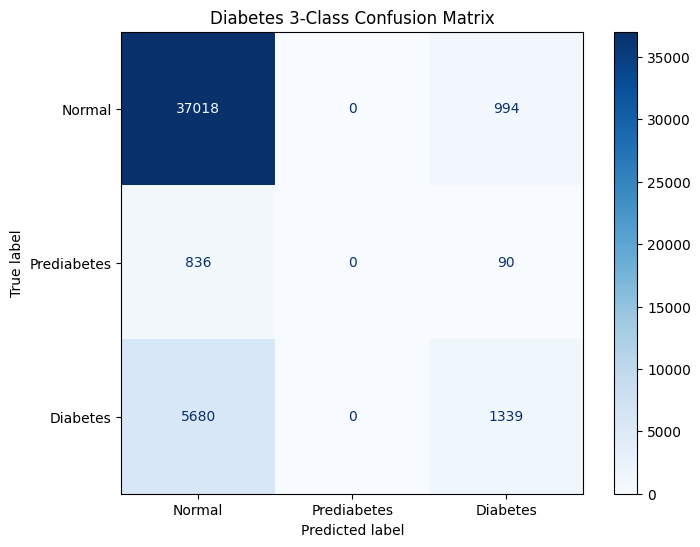


[Feature Importance]
Smoker                  0.161959
Sex                     0.106965
PhysHlth                0.102567
HighBP                  0.093231
MentHlth                0.085711
Age                     0.078331
GenHlth                 0.060850
BMI                     0.057277
HighChol                0.037421
Education               0.030542
Stroke                  0.028961
Veggies                 0.027991
Fruits                  0.025885
Income                  0.025801
HvyAlcoholConsump       0.022390
PhysActivity            0.017848
DiffWalk                0.011519
HeartDiseaseorAttack    0.009829
AnyHealthcare           0.006901
NoDocbcCost             0.005528
CholCheck               0.002494
dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/models/RandomForestClassifier_2026_01_22_17_40_17.joblib'

In [26]:
result_extraction(cv, binary_cols + categorical_cols + numerical_cols)